# MLP (Multilayer Perceptron) Neural Networks

## Binary Classification

This model takes in data which belongs to 1 of 2 classes and is trained to distinguish between the two.

In [1]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)

In [3]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(235, 34) (116, 34) (235,) (116,)


In [4]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [6]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.914


In [7]:
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 233ms/step
Predicted: 0.972


## Multiclass Classification

This model takes in data which belongs to multiple classes and is trained to distinguish which class a given input belongs to.

In [8]:
# mlp for multiclass classification
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
df = read_csv(path, header=None)

In [10]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100,) (50,)


In [11]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)

In [13]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.920


In [14]:
# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

1/1 [==============================] - 0s 155ms/step
Predicted: [[0.9269138  0.06676561 0.00632053]] (class=0)


## MLP for Regression

This model takes in data with a continous variable as an output (i.e. a number), and is trained to predict a single numerical value for a given input

In [15]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)

In [17]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(339, 13) (167, 13) (339,) (167,)


In [18]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')

In [19]:
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 43.392, RMSE: 6.587


In [20]:
# make a prediction
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

1/1 [==============================] - 0s 135ms/step
Predicted: 32.622


## Convolutional Neural Networks

This architecture is primarily used for tasks involving images, most often image classification. Key elements that make this work are feature maps and pooling layers

11490434/11490434 [==============================] - 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


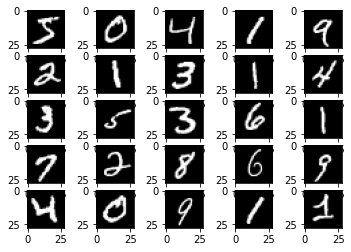

In [21]:
# example of loading and plotting the mnist dataset
from tensorflow.keras.datasets.mnist import load_data
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(25):
	# define subplot
	pyplot.subplot(5, 5, i+1)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [22]:
# example of a cnn for image classification
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [23]:
# load dataset
(x_train, y_train), (x_test, y_test) = load_data()

In [24]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# determine the shape of the input images
in_shape = x_train.shape[1:]
# determine the number of classes
n_classes = len(unique(y_train))
print(in_shape, n_classes)
# normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

(28, 28, 1) 10


In [28]:
# define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
# fit the model
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.987


In [30]:
# make a prediction
image = x_train[0]
yhat = model.predict(asarray([image]))
print('Predicted: class=%d' % argmax(yhat))

1/1 [==============================] - 0s 94ms/step
Predicted: class=5


# Recurrent Neural Networks

This architecture is designed to operate on sequences of data (natural language processing, time series forecasting (US!!), and speech recognition).

This example uses an LSTM, or Long Short-Term Memory network.

Data needs to be transformed to make this work: https://machinelearningmastery.com/machine-learning-data-transforms-for-time-series-forecasting/

In [31]:
# lstm for time series forecasting
from numpy import sqrt
from numpy import asarray
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return asarray(X), asarray(y)

In [9]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0, index_col=0, squeeze=True)

In [10]:
# retrieve the values
values = df.values.astype('float32')
# specify the window size
n_steps = 5
# split into samples
X, y = split_sequence(values, n_steps)
# reshape into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# split into train/test
n_test = 12
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(91, 5, 1) (12, 5, 1) (91,) (12,)


In [11]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', kernel_initializer='he_normal', input_shape=(n_steps,1)))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# fit the model
model.fit(X_train, y_train, epochs=350, batch_size=32, verbose=2, validation_data=(X_test, y_test))
# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, sqrt(mse), mae))

Epoch 1/350
3/3 - 1s - loss: 229418896.0000 - mae: 8987.9619 - val_loss: 117474792.0000 - val_mae: 9372.7119 - 1s/epoch - 420ms/step
Epoch 2/350
3/3 - 0s - loss: 179465280.0000 - mae: 11562.8037 - val_loss: 149359648.0000 - val_mae: 11344.5107 - 43ms/epoch - 14ms/step
Epoch 3/350
3/3 - 0s - loss: 124599360.0000 - mae: 9802.4307 - val_loss: 76500648.0000 - val_mae: 7103.8418 - 33ms/epoch - 11ms/step
Epoch 4/350
3/3 - 0s - loss: 70438336.0000 - mae: 6354.4209 - val_loss: 60564484.0000 - val_mae: 4872.3784 - 32ms/epoch - 11ms/step
Epoch 5/350
3/3 - 0s - loss: 53521368.0000 - mae: 5011.8027 - val_loss: 77280856.0000 - val_mae: 6229.4399 - 28ms/epoch - 9ms/step
Epoch 6/350
3/3 - 0s - loss: 41541504.0000 - mae: 4794.9717 - val_loss: 48480560.0000 - val_mae: 5434.1753 - 33ms/epoch - 11ms/step
Epoch 7/350
3/3 - 0s - loss: 26871144.0000 - mae: 4100.1543 - val_loss: 25873550.0000 - val_mae: 4221.9082 - 33ms/epoch - 11ms/step
Epoch 8/350
3/3 - 0s - loss: 23284308.0000 - mae: 3912.3723 - val_loss:

Epoch 63/350
3/3 - 0s - loss: 10030655.0000 - mae: 2460.7913 - val_loss: 12911205.0000 - val_mae: 2823.3499 - 41ms/epoch - 14ms/step
Epoch 64/350
3/3 - 0s - loss: 10202161.0000 - mae: 2481.4099 - val_loss: 13018656.0000 - val_mae: 2795.6711 - 25ms/epoch - 8ms/step
Epoch 65/350
3/3 - 0s - loss: 11064590.0000 - mae: 2548.4558 - val_loss: 12490223.0000 - val_mae: 2894.0176 - 49ms/epoch - 16ms/step
Epoch 66/350
3/3 - 0s - loss: 10801872.0000 - mae: 2580.3933 - val_loss: 14866760.0000 - val_mae: 3141.7998 - 35ms/epoch - 12ms/step
Epoch 67/350
3/3 - 0s - loss: 11030232.0000 - mae: 2600.5737 - val_loss: 15347208.0000 - val_mae: 3152.4900 - 39ms/epoch - 13ms/step
Epoch 68/350
3/3 - 0s - loss: 11025348.0000 - mae: 2596.8088 - val_loss: 16749491.0000 - val_mae: 3328.5049 - 33ms/epoch - 11ms/step
Epoch 69/350
3/3 - 0s - loss: 10857985.0000 - mae: 2581.3970 - val_loss: 16724336.0000 - val_mae: 3314.2910 - 29ms/epoch - 10ms/step
Epoch 70/350
3/3 - 0s - loss: 10730200.0000 - mae: 2604.8083 - val_los

Epoch 125/350
3/3 - 0s - loss: 8221173.5000 - mae: 2171.0662 - val_loss: 15238264.0000 - val_mae: 3169.6453 - 32ms/epoch - 11ms/step
Epoch 126/350
3/3 - 0s - loss: 10536984.0000 - mae: 2630.6096 - val_loss: 14583852.0000 - val_mae: 3049.2332 - 33ms/epoch - 11ms/step
Epoch 127/350
3/3 - 0s - loss: 10391273.0000 - mae: 2355.4932 - val_loss: 17110206.0000 - val_mae: 3319.3665 - 41ms/epoch - 14ms/step
Epoch 128/350
3/3 - 0s - loss: 8836154.0000 - mae: 2197.3125 - val_loss: 15239303.0000 - val_mae: 3240.6787 - 34ms/epoch - 11ms/step
Epoch 129/350
3/3 - 0s - loss: 10397486.0000 - mae: 2599.9749 - val_loss: 13987216.0000 - val_mae: 3037.5127 - 41ms/epoch - 14ms/step
Epoch 130/350
3/3 - 0s - loss: 8865588.0000 - mae: 2253.6252 - val_loss: 16971282.0000 - val_mae: 3336.8176 - 33ms/epoch - 11ms/step
Epoch 131/350
3/3 - 0s - loss: 9582439.0000 - mae: 2355.3237 - val_loss: 14157849.0000 - val_mae: 3114.0295 - 42ms/epoch - 14ms/step
Epoch 132/350
3/3 - 0s - loss: 9393954.0000 - mae: 2460.3984 - val

Epoch 187/350
3/3 - 0s - loss: 7557315.0000 - mae: 2056.3235 - val_loss: 14981235.0000 - val_mae: 3167.4343 - 29ms/epoch - 10ms/step
Epoch 188/350
3/3 - 0s - loss: 7632835.5000 - mae: 2030.0481 - val_loss: 15058936.0000 - val_mae: 3196.1057 - 46ms/epoch - 15ms/step
Epoch 189/350
3/3 - 0s - loss: 7722204.0000 - mae: 2072.5486 - val_loss: 14822085.0000 - val_mae: 3105.7747 - 42ms/epoch - 14ms/step
Epoch 190/350
3/3 - 0s - loss: 7538117.0000 - mae: 2035.1566 - val_loss: 15068161.0000 - val_mae: 3199.4609 - 30ms/epoch - 10ms/step
Epoch 191/350
3/3 - 0s - loss: 7677254.5000 - mae: 1998.3231 - val_loss: 14433560.0000 - val_mae: 3094.2441 - 45ms/epoch - 15ms/step
Epoch 192/350
3/3 - 0s - loss: 7709647.5000 - mae: 2123.8713 - val_loss: 14199360.0000 - val_mae: 3080.5215 - 41ms/epoch - 14ms/step
Epoch 193/350
3/3 - 0s - loss: 7499404.5000 - mae: 2007.3132 - val_loss: 14896217.0000 - val_mae: 3219.3313 - 34ms/epoch - 11ms/step
Epoch 194/350
3/3 - 0s - loss: 7770104.5000 - mae: 2093.4077 - val_lo

Epoch 249/350
3/3 - 0s - loss: 7263588.5000 - mae: 2137.0542 - val_loss: 15107445.0000 - val_mae: 3264.2031 - 36ms/epoch - 12ms/step
Epoch 250/350
3/3 - 0s - loss: 7609160.5000 - mae: 2085.1580 - val_loss: 16162588.0000 - val_mae: 3482.6992 - 34ms/epoch - 11ms/step
Epoch 251/350
3/3 - 0s - loss: 7272871.5000 - mae: 2006.4822 - val_loss: 14368753.0000 - val_mae: 3106.2012 - 37ms/epoch - 12ms/step
Epoch 252/350
3/3 - 0s - loss: 7308085.5000 - mae: 2118.7590 - val_loss: 15212716.0000 - val_mae: 3301.6992 - 49ms/epoch - 16ms/step
Epoch 253/350
3/3 - 0s - loss: 6969843.5000 - mae: 1916.1051 - val_loss: 14307279.0000 - val_mae: 3192.7449 - 38ms/epoch - 13ms/step
Epoch 254/350
3/3 - 0s - loss: 6603106.0000 - mae: 1893.1998 - val_loss: 17704684.0000 - val_mae: 3567.8477 - 41ms/epoch - 14ms/step
Epoch 255/350
3/3 - 0s - loss: 7300076.5000 - mae: 2136.3452 - val_loss: 15448727.0000 - val_mae: 3338.4973 - 40ms/epoch - 13ms/step
Epoch 256/350
3/3 - 0s - loss: 7264856.5000 - mae: 2043.0001 - val_lo

Epoch 311/350
3/3 - 0s - loss: 12070686.0000 - mae: 2683.8660 - val_loss: 40678408.0000 - val_mae: 4486.7129 - 46ms/epoch - 15ms/step
Epoch 312/350
3/3 - 0s - loss: 17778756.0000 - mae: 3310.6360 - val_loss: 13024017.0000 - val_mae: 2826.6418 - 34ms/epoch - 11ms/step
Epoch 313/350
3/3 - 0s - loss: 9160862.0000 - mae: 2475.7261 - val_loss: 20999114.0000 - val_mae: 4013.5098 - 41ms/epoch - 14ms/step
Epoch 314/350
3/3 - 0s - loss: 11243130.0000 - mae: 2604.8684 - val_loss: 13172904.0000 - val_mae: 2894.9373 - 42ms/epoch - 14ms/step
Epoch 315/350
3/3 - 0s - loss: 10008165.0000 - mae: 2503.4263 - val_loss: 12191421.0000 - val_mae: 2922.7087 - 43ms/epoch - 14ms/step
Epoch 316/350
3/3 - 0s - loss: 8812710.0000 - mae: 2286.0488 - val_loss: 14654468.0000 - val_mae: 3227.0613 - 33ms/epoch - 11ms/step
Epoch 317/350
3/3 - 0s - loss: 8817845.0000 - mae: 2315.2888 - val_loss: 13395445.0000 - val_mae: 2993.9961 - 33ms/epoch - 11ms/step
Epoch 318/350
3/3 - 0s - loss: 9109344.0000 - mae: 2435.2512 - va

In [ ]:
# make a prediction
row = asarray([18024.0, 16722.0, 14385.0, 21342.0, 17180.0]).reshape((1, n_steps, 1))
yhat = model.predict(row)
print('Predicted: %.3f' % (yhat))

# Visualizing a Model

In [17]:
# example of summarizing a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                90        
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [18]:
# example of plotting a model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# summarize the model
plot_model(model, 'model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Plotting Model Learning Curves

In [20]:
# example of plotting learning curves
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

In [21]:
# create the dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]

In [22]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')

In [23]:
# fit the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

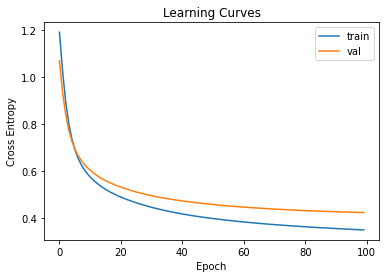

In [24]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# Saving Your Model

In [25]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [26]:
# example of saving a fit model
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# create the dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=1)
# determine the number of input features
n_features = X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(1, activation='sigmoid'))
# compile the model
sgd = SGD(learning_rate=0.001, momentum=0.8)
model.compile(optimizer=sgd, loss='binary_crossentropy')
# fit the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0, validation_split=0.3)

In [27]:
# save model to file
model.save('model.h5')

# How to Get Better Model Performance

1. Reduce overfitting by dropping outputs between layers. Ex:
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

2. Add batch normalization to standardize inputs. Reduces number of epochs needed to train model. Ex:
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

3. Early stopping allows you to stop training a model when there are signs of overfitting. Ex:
#configure early stopping
es = EarlyStopping(monitor='val_loss', patience=5)
#fit the model
history = model.fit(X, y, epochs=200, batch_size=32, verbose=0, validation_split=0.3, callbacks=[es])